In [141]:
import numpy as np
import cv2
import cvutils
from skimage import io
from numpy import linalg as LA

In [175]:
import os
from os import listdir
from PIL import Image
from matplotlib.pyplot import imshow

In [143]:
def show_image(vector,index):
    #reshape and show the image
    fresh_img=vector[index].reshape(243,320)
    print("image number ",index)
    img = Image.fromarray(fresh_img, 'L')
    img.show()
    
    

In [144]:
# ! pip install opencv-python
# ! pip install cvutils
# !pip install scikit-image

## Start here

In [145]:
curr_path=os.getcwd()
train_images_path=os.path.join(curr_path,"train_images")
# print(train_images_path)
print(len(listdir(train_images_path)))
files=listdir(train_images_path)
files.sort()
# print(files)

4


## Step 1. Read image and flatten into 1d matrices

In [153]:
list_of_1d_matrix=[]

# add all image matrix into this list as 1D

for train_image in files:
#     print(train_image)
    file_name=os.path.join(train_images_path,train_image)    
    
#     print(file_name)
    if ".DS" in train_image:
        continue
    
    image_pil = Image.open(file_name).convert('L')

    image = np.array(image_pil, 'uint8')
    
    print(image.flatten().transpose().shape)
    flat_image=image.flatten()
    img = Image.fromarray(flat_image.reshape(243,320), 'L')
    img.show()

    
    list_of_1d_matrix.append(image.flatten().transpose())
    
#     print(image.shape)
matrix_vectors=np.array(list_of_1d_matrix)

(77760,)
(77760,)
(77760,)


In [147]:
print(list_of_1d_matrix[0])
print(matrix_vectors)


[130 130 130 ...  68  68  68]
[[130 130 130 ...  68  68  68]
 [130 130 130 ...  68  68  68]
 [130 130 130 ...  68  68  68]]


## Step 2. Calculate average of the matrix

In [110]:
avg_vector=matrix_vectors.mean(0)

In [156]:
print(avg_vector)


[130. 130. 130. ...  68.  68.  68.]


In [157]:
print(matrix_vectors[0])

[130 130 130 ...  68  68  68]


## Step 3. Calculate the mean faces

In [112]:
mean_faces_broad=(matrix_vectors-avg_vector)
mean_faces_tall=mean_faces_broad.transpose()
print(mean_faces_broad.shape)
print(mean_faces_tall.shape)

(3, 77760)
(77760, 3)


In [170]:
print(mean_faces_broad[0])
print(avg_vector)
print(mean_faces_broad[0]+avg_vector)
print(matrix_vectors[0])
print(np.array_equal(matrix_vectors[0],(mean_faces_broad[0]+avg_vector)))

[0. 0. 0. ... 0. 0. 0.]
[130. 130. 130. ...  68.  68.  68.]
[130. 130. 130. ...  68.  68.  68.]
[130 130 130 ...  68  68  68]
True


In [171]:
img = Image.fromarray((mean_faces_broad[0]+avg_vector).reshape(243,320), 'L')
img.show()

In [172]:
img = Image.fromarray((matrix_vectors[0]).reshape(243,320), 'L')
img.show()

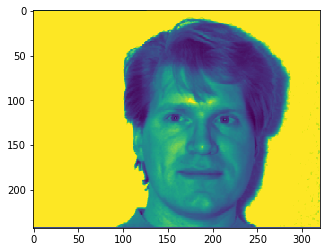

In [178]:
imshow(np.asarray((matrix_vectors[0]).reshape(243,320)))

In [179]:
np.array_equal((mean_faces_broad[0]+avg_vector).reshape(243,320),(matrix_vectors[0]).reshape(243,320))

True

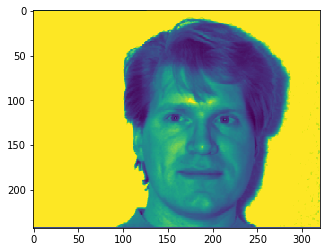

In [180]:
imshow(np.asarray((mean_faces_broad[0]+avg_vector).reshape(243,320)))

## Step 4. Calculate covariance matrix

In [181]:
print("multiplying a ",mean_faces_broad.shape," matrix with ",mean_faces_tall.shape)

multiplying a  (3, 77760)  matrix with  (77760, 3)


In [182]:
mean_faces_broad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [183]:
mean_faces_tall

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [184]:
# covar_matrix=np.cov(normalized_matrix)

small_covar_matrix=mean_faces_broad.dot(mean_faces_tall)
print( small_covar_matrix.shape)
# print(small_covar_matrix)

(3, 3)


## Step 5. Calculate Eigen vectors and Eigen values

### consider the matrix [3,X3]

### compute the eigenvectors of  this small co variance matrix

In [185]:
eigen_values_small, eigen_vectors_small = LA.eig(small_covar_matrix)

In [186]:
print(eigen_vectors_small)

[[-0.57735027 -0.81306573 -0.07477156]
 [-0.57735027  0.47128694 -0.6667498 ]
 [-0.57735027  0.34177879  0.74152136]]


In [187]:
print(eigen_values_small)

[-8.94069672e-08  8.88520242e+07  2.53064587e+08]


In [188]:
idx = eigen_values_small.argsort()[::-1]   
eigen_values_small = eigen_values_small[idx]
eigen_vectors_small = eigen_vectors_small[:,idx]


# print(eigen_values_small)
# print(eigen_vectors_small)

# need to trim it here... take first k values
print(eigen_values_small.shape)


if eigen_vectors_small.shape[0]>=10:
    print("need to shorten")
    top=int(eigen_vectors_small.shape[0]*0.1)
    print("will take ",top)
    eigen_values_small=eigen_values_small[:top]
    eigen_vectors_small=eigen_vectors_small[:top]
print(eigen_values_small.shape)    

(3,)
(3,)


#### now to calculate the eigen values and eigen vectors of the big matrix
#### Needs to be noted that eigen values are same
#### eigen vector is nothing but (7760X3)times(small_eigen_vector[3,])

In [189]:
print(mean_faces_broad.shape,eigen_vectors_small[0].shape)

(3, 77760) (3,)


In [190]:
list_large_eigen_vector=[]
for eigen_vector_single in eigen_vectors_small:
    x=mean_faces_tall.dot(eigen_vector_single)
    # now normalize them
#     print(eigen_vector_single)
    normalized_eigen_vector=x / np.linalg.norm(x)    
    list_large_eigen_vector.append(x)


large_eigen_vectors=np.array(list_large_eigen_vector)
print(large_eigen_vectors.shape)

(3, 77760)


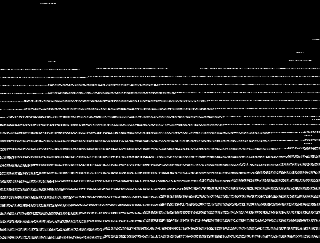

In [191]:
new_img=large_eigen_vectors[0].reshape(243,320)
img = Image.fromarray(new_img, 'L')
img

## Step 6. Mapping image into eigen faces

face = sum(w.u)+mean

basically we need to now calculate just the w values

face1 = w11u1+w12u2+w13u3+mean

face2 = w21u1+w22u2+w23u3+mean

...

Now w=u(face)transpose

where u is the new eigen vector

basically we are projecting the face on the direction of the eigen vector


[

face1: [w11 w12 w13]

face2: [w21 w22 w23]

face3: [w31 w32 w33

]

w11=eigen_vector1(Transpose) mean_face1

w12=eigen_vector2(Transpose) mean_face1

w13=eigen_vector3(Transpose) mean_face1



In [195]:
# for each image
# we have to store a set of weights
list_of_weights=[]
i=0

for mean_face in mean_faces_broad:
#     print(mean_face.shape)
    weights_for_this_face=[]
    print("for face ",i)
    i=i+1
    for eigen_vector in large_eigen_vectors:
#         print(eigen_vector.shape, mean_face.shape)
        weight=(eigen_vector.transpose().dot(mean_face))
        print("weights ",weight)
#         print(mean_face)
        weights_for_this_face.append(weight)
    list_of_weights.append(weights_for_this_face)
weight_vector=np.array(list_of_weights)


for face  0
weights  35283043.922772065
weights  -27850658.44800876
weights  59636188.85671675
for face  1
weights  -41940741.49362716
weights  140583742.3305935
weights  93277833.63319328
for face  2
weights  6657697.570855097
weights  -112733083.88258478
weights  -152914022.48991004


In [125]:
print(weight_vector)

[[ 3.52830439e+07 -2.78506584e+07  5.96361889e+07]
 [-4.19407415e+07  1.40583742e+08  9.32778336e+07]
 [ 6.65769757e+06 -1.12733084e+08 -1.52914022e+08]]


### Detour to check if I can get face back

In [126]:
# Check if the weights give me back my face
# lets try for face 0
face1_vector=weight_vector[0]
print(face1_vector.shape)
i=0
image_matrix=np.zeros(77760,)
print("skeleton is ",image_matrix.shape)
for eigen_vector in large_eigen_vectors:
    print("and face vector looks like",face1_vector[i])
    print("going to multiply",face1_vector[i].shape,eigen_vector.shape)
    image_matrix+=(face1_vector[i]*eigen_vector)
    print((face1_vector[i]*eigen_vector).shape)
    i=i+1

(3,)
skeleton is  (77760,)
and face vector looks like 35283043.922772065
going to multiply () (77760,)
(77760,)
and face vector looks like -27850658.44800876
going to multiply () (77760,)
(77760,)
and face vector looks like 59636188.85671675
going to multiply () (77760,)
(77760,)


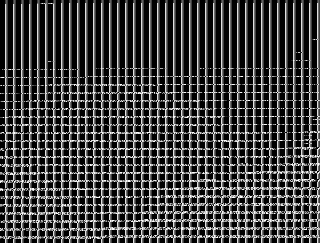

In [127]:
# add the mean back
image_matrix=image_matrix+avg_vector

new_img=image_matrix.reshape(243,320)
img = Image.fromarray(new_img, 'L')
img

### End of Detour

## Step 1. Given test image, search for closest match

In [128]:
curr_path=os.getcwd()
test_images_path=os.path.join(curr_path,"test_images")
print(test_images_path)
files=listdir(test_images_path)
files.sort()

/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/test_images


In [129]:
list_of_1d_matrix=[]
test_matrix_vectors=None
# add all image matrix into this list as 1D

for test_image in files:
#     print(test_image)
    file_name=os.path.join(test_images_path,test_image)    
    
    print(file_name)
    if ".DS" in test_image:
        continue
    
    image_pil = Image.open(file_name).convert('L')
    image = np.array(image_pil, 'uint8')
    list_of_1d_matrix.append(image.flatten().transpose())
    
    print(image.shape)
test_matrix_vectors=np.array(list_of_1d_matrix)



/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/test_images/.DS_Store
/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/test_images/subject01.happy
(243, 320)


In [130]:
print(list_of_1d_matrix[0])
print(test_matrix_vectors)


[130 130 130 ...  68  68  68]
[[130 130 130 ...  68  68  68]]


## Step 2. Get Mean Face

In [131]:
test_mean_faces=(test_matrix_vectors-avg_vector)
    

In [132]:
print(test_mean_faces.shape)

(1, 77760)


## Step 3. Project into eigen space

In [133]:
# need to create my own set of weights for eeach face
face_number=0
for test_mean_face in test_mean_faces:
    test_face_set_of_weights=[]
    print("for a face ",face_number)
    for eigen_vector in large_eigen_vectors:
        print(eigen_vector.shape,test_mean_face.shape)
        test_face_set_of_weights.append(eigen_vector.transpose().dot(test_mean_face))
    print(test_face_set_of_weights)
    
    #may or may not want to project, need to ask someone
    '''
    test_image_projection=np.zeros(77760,)
    i=0
    for weight in face_set_of_weights:
        print(weight,large_eigen_vectors[i].shape)
        test_image_projection+=weight*large_eigen_vectors[i]
        print("test image projection shape is ",test_image_projection.shape)
        i=i+1
    print("this is the test image ",test_image_projection)
    '''
    
    # now that we have got the weight set for this face,
    # let us compare it with the weights of the original faces
    i=0
    distances=[]
    for original_weight in weight_vector:
        print(i)
        print("yo",test_face_set_of_weights)
        dist=np.linalg.norm(original_weight-test_face_set_of_weights)
        distances.append(dist)
        i=i+1

    print("dist is ",distances)

    face_match=distances.index(min(distances))
    print("matches with face ",face_match)
    
    
    show_image(test_matrix_vectors,face_number)
    show_image(matrix_vectors,face_match)
    
    face_number+=1


        
        
    
        
    
    

for a face  0
(77760,) (77760,)
(77760,) (77760,)
(77760,) (77760,)
[12047991.23186221, -35848929.407545805, -19867494.26067769]
0
yo [12047991.23186221, -35848929.407545805, -19867494.26067769]
1
yo [12047991.23186221, -35848929.407545805, -19867494.26067769]
2
yo [12047991.23186221, -35848929.407545805, -19867494.26067769]
dist is  [83214635.97903077, 216437372.33244616, 153758275.05843538]
matches with face  0
image number  0
image number  0


### To convert image to matrix

In [134]:
image_pil = Image.open("/Users/amirulislam/projects/hbku/fall_2019/app_deep_learning/Face_Detection_MDC/yalefaces/subject01.glasses").convert('L')

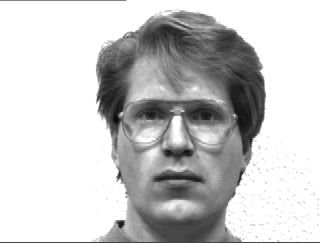

In [135]:
image_pil

In [136]:
image = np.array(image_pil, 'uint8')

In [137]:
print(image)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 252 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]


In [138]:
flattened_image=image.flatten().transpose()
print(flattened_image)

[130 130 130 ...  68  68  68]


In [139]:
new_img=flattened_image.reshape(243,320)


### To convert from flattened matrix to image

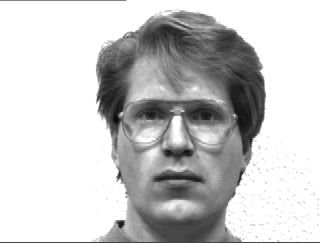

In [140]:
img = Image.fromarray(new_img, 'L')
img


In [196]:
from shutil import copy


In [ ]:
# files=listdir(train_images_path)

# for train_image in files:
#     if ".DS" in train_image:
#         continue
#     src=os.path.join(train_images_path,train_image)
#     dest=None
#     if "01" in train_image:
#         dest=os.path.join(curr_path,"1")
#     elif "02" in train_image:
#         dest=os.path.join(curr_path,"2")
#     elif "03" in train_image:
#         dest=os.path.join(curr_path,"3")
#     elif "04" in train_image:
#         dest=os.path.join(curr_path,"4")
#     elif "05" in train_image:
#         dest=os.path.join(curr_path,"5")
#     elif "06" in train_image:
#         dest=os.path.join(curr_path,"6")
#     elif "07" in train_image:
#         dest=os.path.join(curr_path,"7")
#     elif "08" in train_image:
#         dest=os.path.join(curr_path,"8")
#     elif "09" in train_image:
#         dest=os.path.join(curr_path,"9")
#     elif "10" in train_image:
#         dest=os.path.join(curr_path,"10")
#     elif "11" in train_image:
#         dest=os.path.join(curr_path,"11")
#     elif "12" in train_image:
#         dest=os.path.join(curr_path,"12")
#     elif "13" in train_image:
#         dest=os.path.join(curr_path,"13")
#     elif "14" in train_image:
#         dest=os.path.join(curr_path,"14")
#     elif "15" in train_image:
#         dest=os.path.join(curr_path,"15")
#     print(src,"-------",dest)        
#     copy(src, dest)

    